In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt   # plotting

In [2]:
marketDF = pd.read_excel('BTCUSDHourlyIndicators.xlsx')
print(marketDF.head())

      Close      Open       Low      High       Volume              Date  \
0  11248.35  11335.46  11220.00  11389.00  3192.171488  2020-08-01T00:00   
1  11266.97  11247.86  11226.23  11303.03  1685.735081  2020-08-01T01:00   
2  11334.81  11266.97  11258.71  11345.32  2095.667551  2020-08-01T02:00   
3  11366.16  11334.91  11318.59  11405.93  2687.160709  2020-08-01T03:00   
4  11388.21  11366.16  11335.00  11428.05  3062.946602  2020-08-01T04:00   

   stochastic    momentum    wiliams           ADI           EMA       MACD  \
0   41.246246  178.371941 -58.753754  1.525144e+06  11269.699648  60.994755   
1   46.837838  151.648441 -53.162162  1.525247e+06  11269.335695  55.502645   
2   67.210210  131.334529 -32.789790  1.526834e+06  11278.065603  55.978939   
3   74.695231  123.555588 -25.304769  1.527074e+06  11289.811522  58.215022   
4   76.017711  128.605853 -23.982289  1.527514e+06  11302.931319  61.062494   

         RSI  on_balance_volume      bb_bbm  
0  52.541334      2158

In [3]:
marketDF.Date = pd.to_datetime(marketDF['Date'])
marketDF = marketDF.set_index('Date')
print(marketDF)


                        Close      Open       Low      High       Volume  \
Date                                                                       
2020-08-01 00:00:00  11248.35  11335.46  11220.00  11389.00  3192.171488   
2020-08-01 01:00:00  11266.97  11247.86  11226.23  11303.03  1685.735081   
2020-08-01 02:00:00  11334.81  11266.97  11258.71  11345.32  2095.667551   
2020-08-01 03:00:00  11366.16  11334.91  11318.59  11405.93  2687.160709   
2020-08-01 04:00:00  11388.21  11366.16  11335.00  11428.05  3062.946602   
...                       ...       ...       ...       ...          ...   
2020-12-01 21:00:00  19038.39  19024.33  18936.61  19211.00  2275.278570   
2020-12-01 22:00:00  18895.00  19038.39  18830.18  19156.72  1719.522796   
2020-12-01 23:00:00  18764.96  18895.01  18725.00  18943.26  2883.101590   
2020-12-02 00:00:00  18836.51  18764.96  18433.00  18877.92  4372.162317   
2020-12-02 01:00:00  18854.01  18836.50  18703.00  18972.12  2504.979019   

           

In [4]:
print(marketDF.describe())

              Close          Open           Low          High        Volume  \
count   2881.000000   2881.000000   2881.000000   2881.000000   2881.000000   
mean   12701.235727  12698.701840  12639.947386  12750.559094   2730.877898   
std     2543.004958   2540.886639   2510.504711   2566.766253   2045.266257   
min     9946.140000   9946.140000   9825.000000  10029.530000    378.251302   
25%    10878.830000  10880.170000  10851.010000  10905.130000   1520.271931   
50%    11630.360000  11630.560000  11588.550000  11664.180000   2147.839050   
75%    13677.250000  13673.580000  13592.450000  13738.890000   3205.799983   
max    19739.510000  19739.510000  19558.770000  19888.000000  21611.397748   

        stochastic     momentum      wiliams           ADI           EMA  \
count  2881.000000  2881.000000  2881.000000  2.881000e+03   2881.000000   
mean     58.862892    40.053000   -41.137108  1.836516e+06  12683.818646   
std      24.796619   226.198782    24.796619  1.911409e+05  

### Plot original data

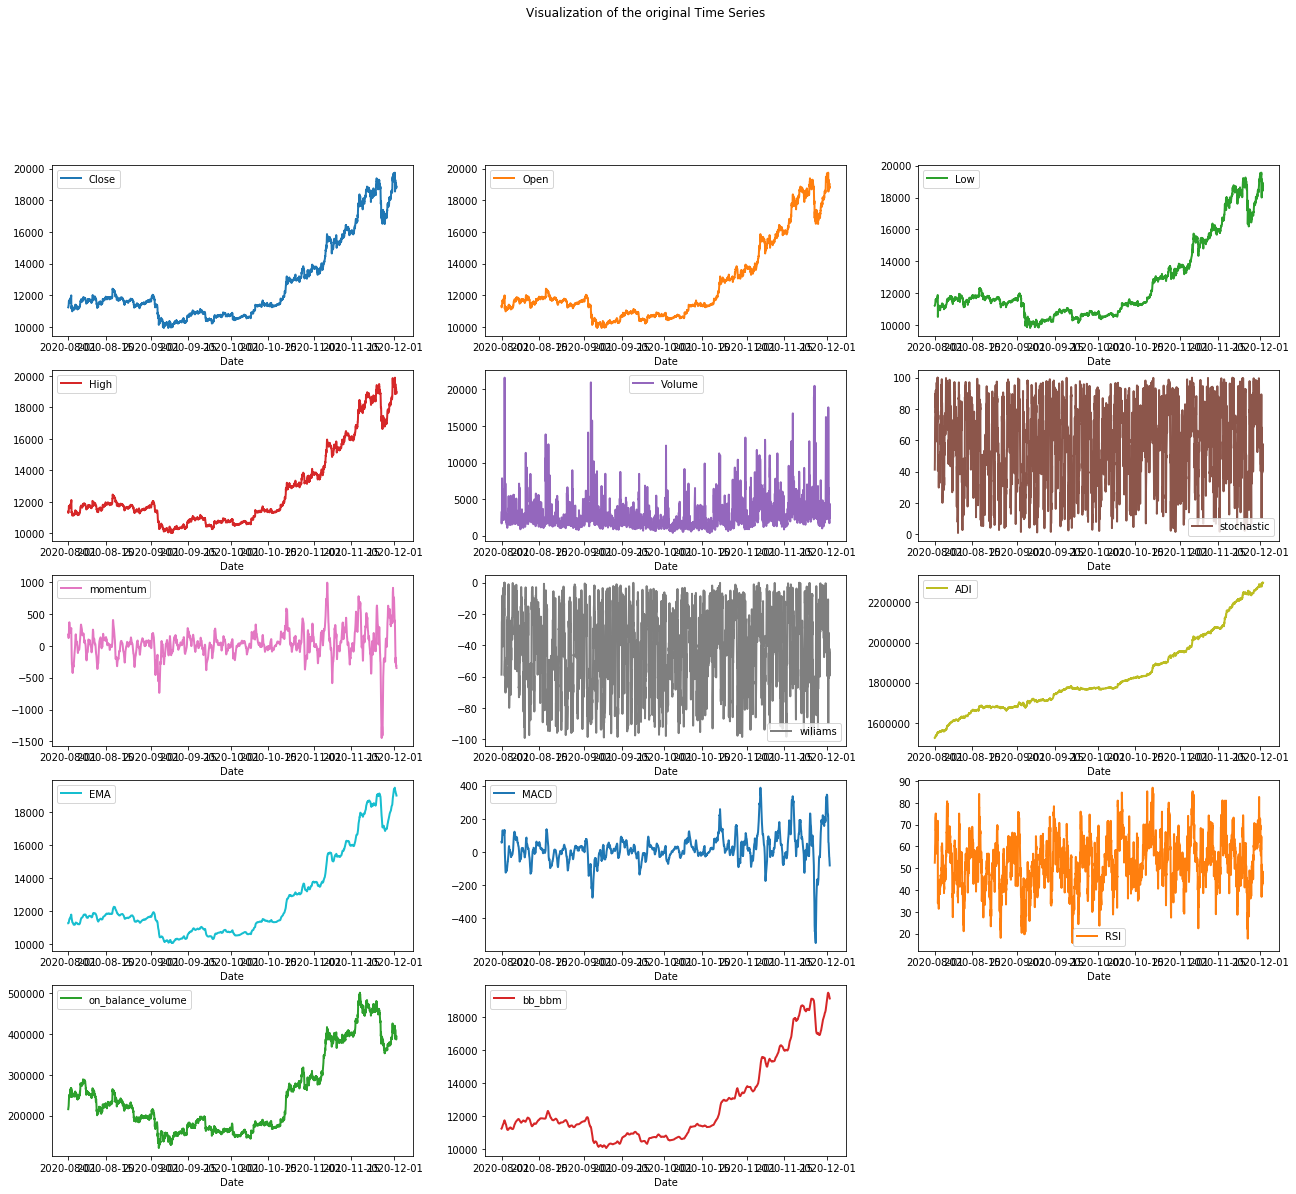

In [5]:
%matplotlib inline
marketDF.plot(subplots=True,
        layout=(6, 3),
        figsize=(22,22),
        fontsize=10, 
        linewidth=2,
        sharex=False,
        title='Visualization of the original Time Series')
plt.show()


## Plot  probability distribution function


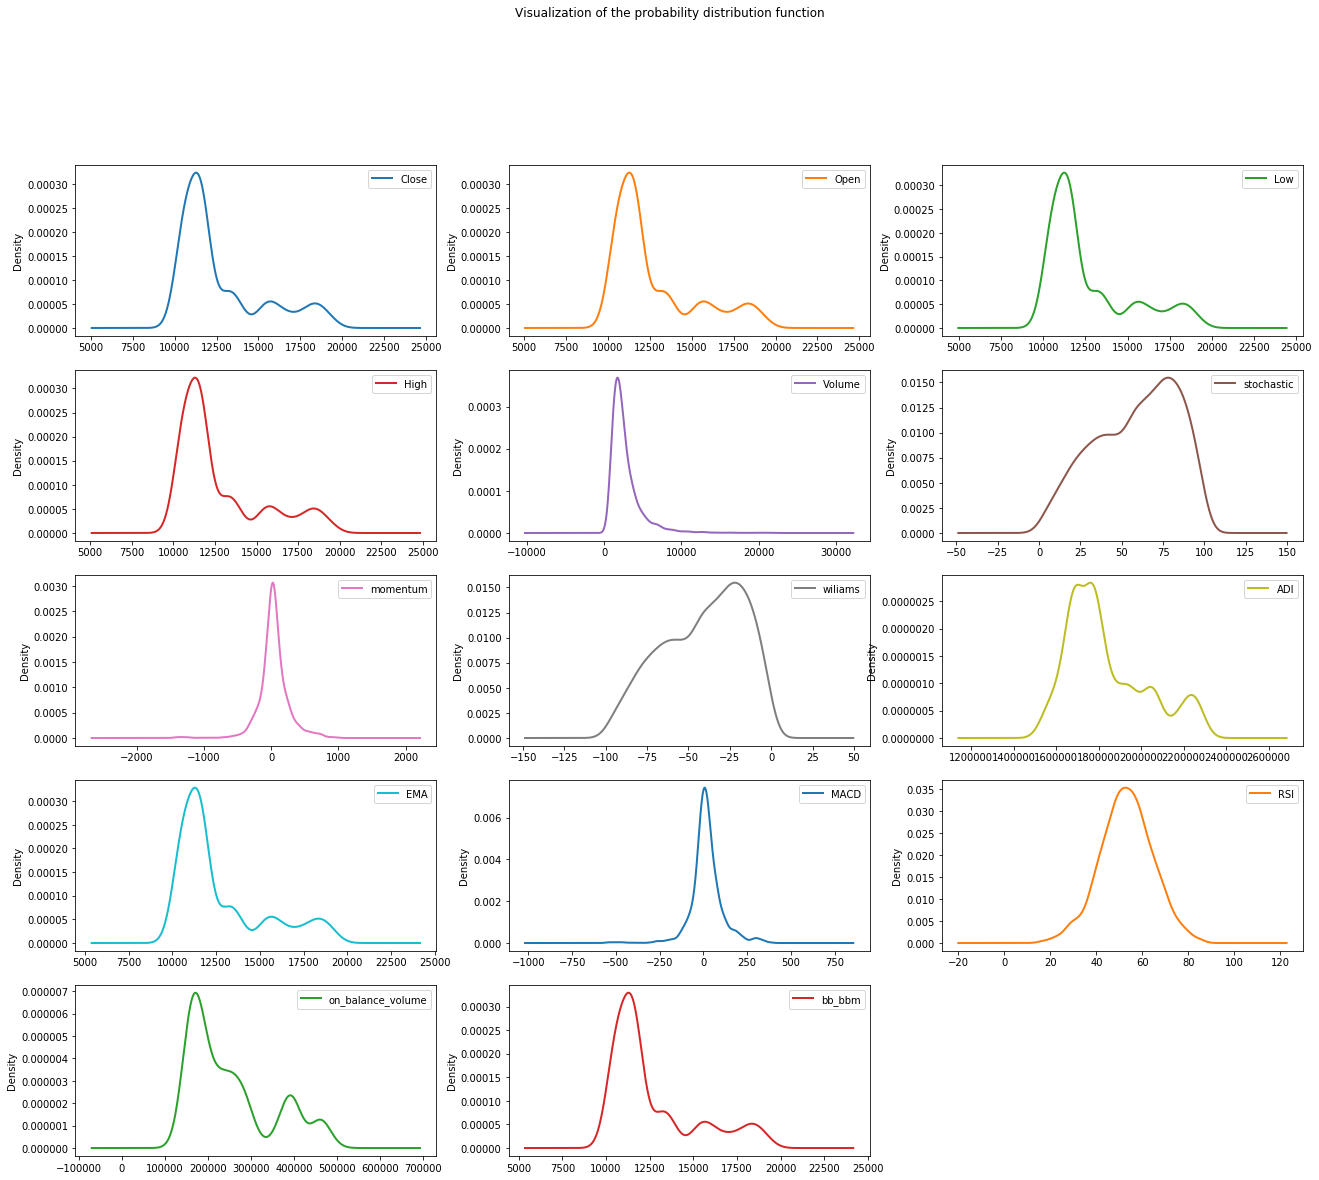

In [6]:
%matplotlib inline
marketDF.plot(kind='kde',subplots=True,
        layout=(6, 3),
        figsize=(22,22),
        fontsize=10, 
        linewidth=2,
        sharex=False,
        title='Visualization of the probability distribution function')
plt.show()


## kurtorosis and skeness

In [7]:
# data kurtorosis
print(marketDF.kurt(axis = 0 , skipna = True))

Close                 0.293953
Open                  0.299420
Low                   0.289012
High                  0.298825
Volume               15.594061
stochastic           -0.896807
momentum              7.679419
wiliams              -0.896807
ADI                  -0.272316
EMA                   0.302064
MACD                  6.697082
RSI                   0.093534
on_balance_volume    -0.443179
bb_bbm                0.320549
dtype: float64


In [8]:
marketDF.skew(axis = 0, skipna = True) 

Close                1.242031
Open                 1.243411
Low                  1.237855
High                 1.245064
Volume               3.133342
stochastic          -0.363480
momentum            -0.652123
wiliams             -0.363480
ADI                  0.824489
EMA                  1.248182
MACD                -0.369272
RSI                 -0.080758
on_balance_volume    0.893043
bb_bbm               1.253346
dtype: float64

## Plot probability distribution function with seaborn


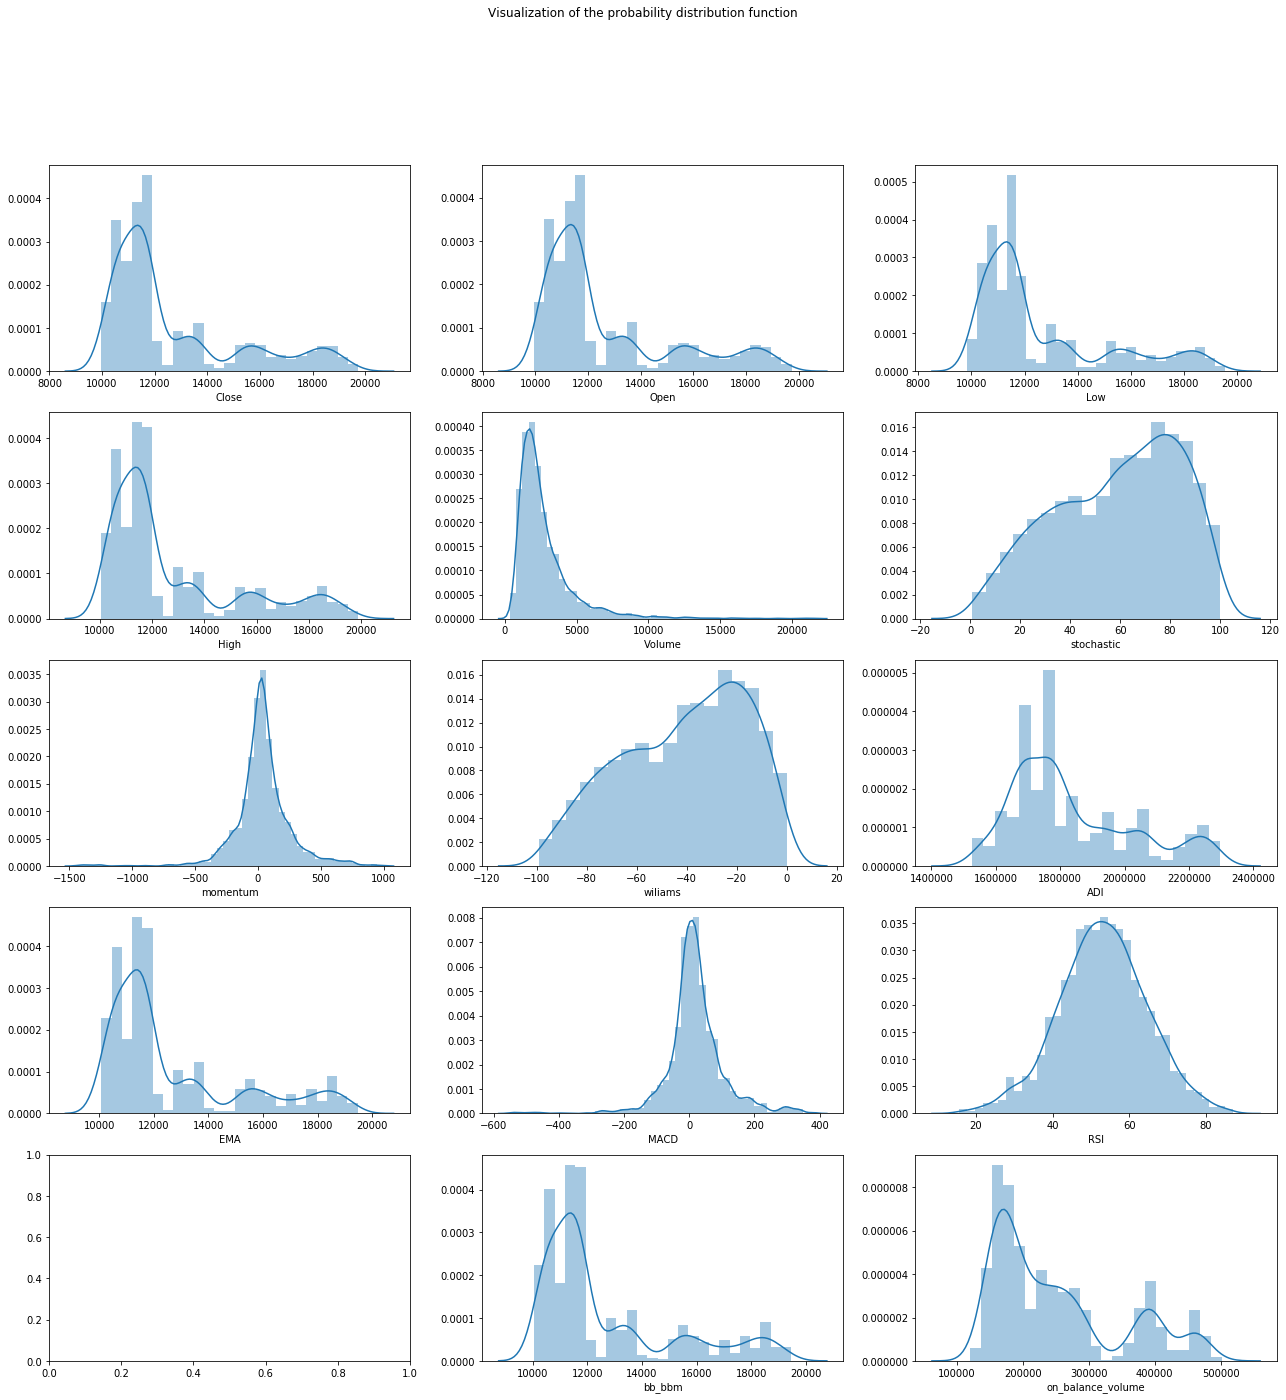

In [9]:
fig, axes = plt.subplots(5, 3, figsize=(22,22))
fig.suptitle('Visualization of the probability distribution function')


sns.distplot( marketDF['Close'],ax=axes[0, 0])
sns.distplot( marketDF['Open'],ax=axes[0, 1])
sns.distplot( marketDF['Low'],ax=axes[0, 2],)
sns.distplot( marketDF['High'], ax=axes[1, 0])
sns.distplot( marketDF['Volume'], ax=axes[1, 1])
sns.distplot( marketDF['stochastic'],ax=axes[1, 2])
sns.distplot( marketDF['momentum'] ,ax=axes[2, 0])
sns.distplot( marketDF['wiliams'],ax=axes[2, 1])
sns.distplot( marketDF['ADI'],ax=axes[2 ,2])
sns.distplot( marketDF['EMA'],ax=axes[3 ,0])
sns.distplot( marketDF['MACD'],ax=axes[3, 1])
sns.distplot( marketDF['RSI'],ax=axes[3, 2])
sns.distplot( marketDF['on_balance_volume'])
sns.distplot( marketDF['bb_bbm'],ax=axes[4, 1])


### Maximum Normalization
data = data/max(data)

In [10]:

normalMaxDF = pd.DataFrame()

for col in marketDF.columns:
    normalMaxDF[col] = marketDF[col]/abs(max(marketDF[col]))
print(normalMaxDF.describe())

             Close         Open          Low         High       Volume  \
count  2881.000000  2881.000000  2881.000000  2881.000000  2881.000000   
mean      0.643442     0.643314     0.646255     0.641118     0.126363   
std       0.128828     0.128721     0.128357     0.129061     0.094638   
min       0.503870     0.503870     0.502332     0.504301     0.017502   
25%       0.551120     0.551187     0.554790     0.548327     0.070346   
50%       0.589192     0.589202     0.592499     0.586493     0.099385   
75%       0.692887     0.692701     0.694954     0.690813     0.148338   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        stochastic     momentum  wiliams          ADI          EMA  \
count  2881.000000  2881.000000   2878.0  2881.000000  2881.000000   
mean      0.588629     0.040303     -inf     0.799212     0.651536   
std       0.247966     0.227611      NaN     0.083180     0.129549   
min       0.007619    -1.455526     -inf     0.663710

In [ ]:
import matplotlib.pyplot as plt   # plotting

%matplotlib inline
normalMaxDF.plot(subplots=True,
        layout=(6, 3),
        figsize=(22,22),
        fontsize=10, 
        linewidth=2,
        sharex=False,
        title='Visualization of the normalize by max value')
plt.show()

## Min/Max normalization

Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))


X_scaled = X_std * (max - min) + min

In [12]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

min_max_scaler = MinMaxScaler()
normalMinMaxDF = pd.DataFrame()
d =  min_max_scaler.fit_transform(marketDF)
for col , i in zip(marketDF.columns, range(len(marketDF.columns))):
    normalMinMaxDF[col] = d[:,i]
print(normalMinMaxDF.describe())

             Close         Open          Low         High       Volume  \
count  2881.000000  2881.000000  2881.000000  2881.000000  2881.000000   
mean      0.281323     0.281064     0.289194     0.276009     0.110800   
std       0.259666     0.259450     0.257917     0.260362     0.096324   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.095237     0.095374     0.105407     0.088817     0.053785   
50%       0.171976     0.171996     0.181179     0.165812     0.083341   
75%       0.380983     0.380609     0.387049     0.376261     0.133167   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        stochastic     momentum      wiliams          ADI          EMA  \
count  2881.000000  2881.000000  2881.000000  2881.000000  2881.000000   
mean      0.585471     0.609168     0.585471     0.402933     0.277658   
std       0.249870     0.092693     0.249870     0.247347     0.268545   
min       0.000000     0.000000     0

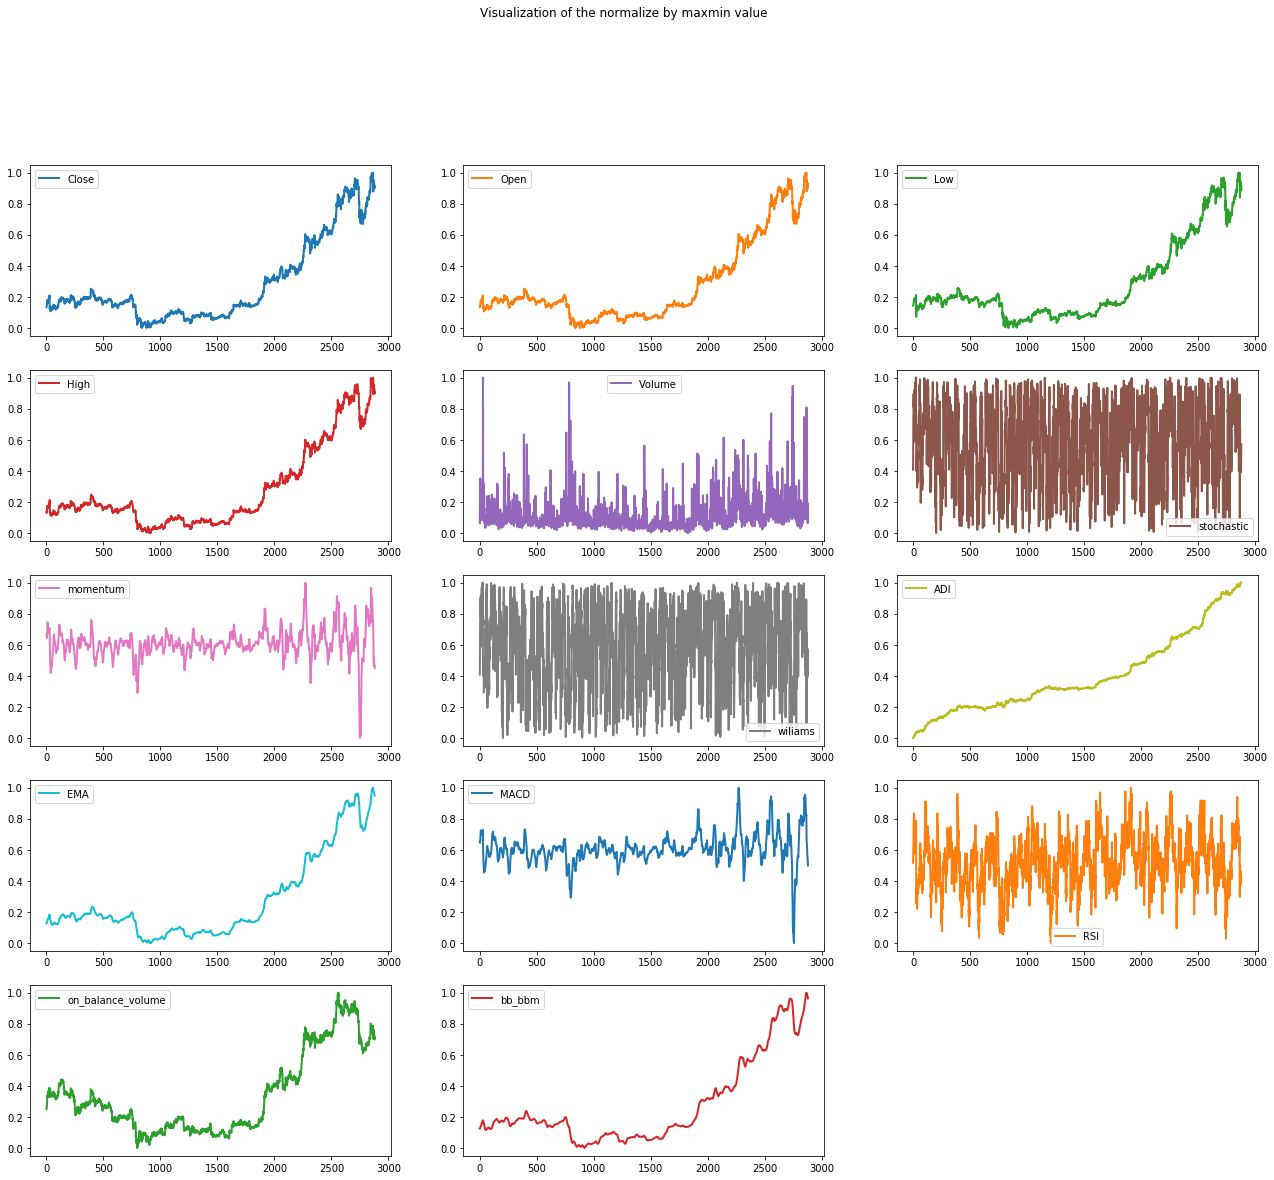

In [13]:
%matplotlib inline
normalMinMaxDF.plot(subplots=True,
        layout=(6, 3),
        figsize=(22,22),
        fontsize=10, 
        linewidth=2,
        sharex=False,
        title='Visualization of the normalize by maxmin value')
plt.show()

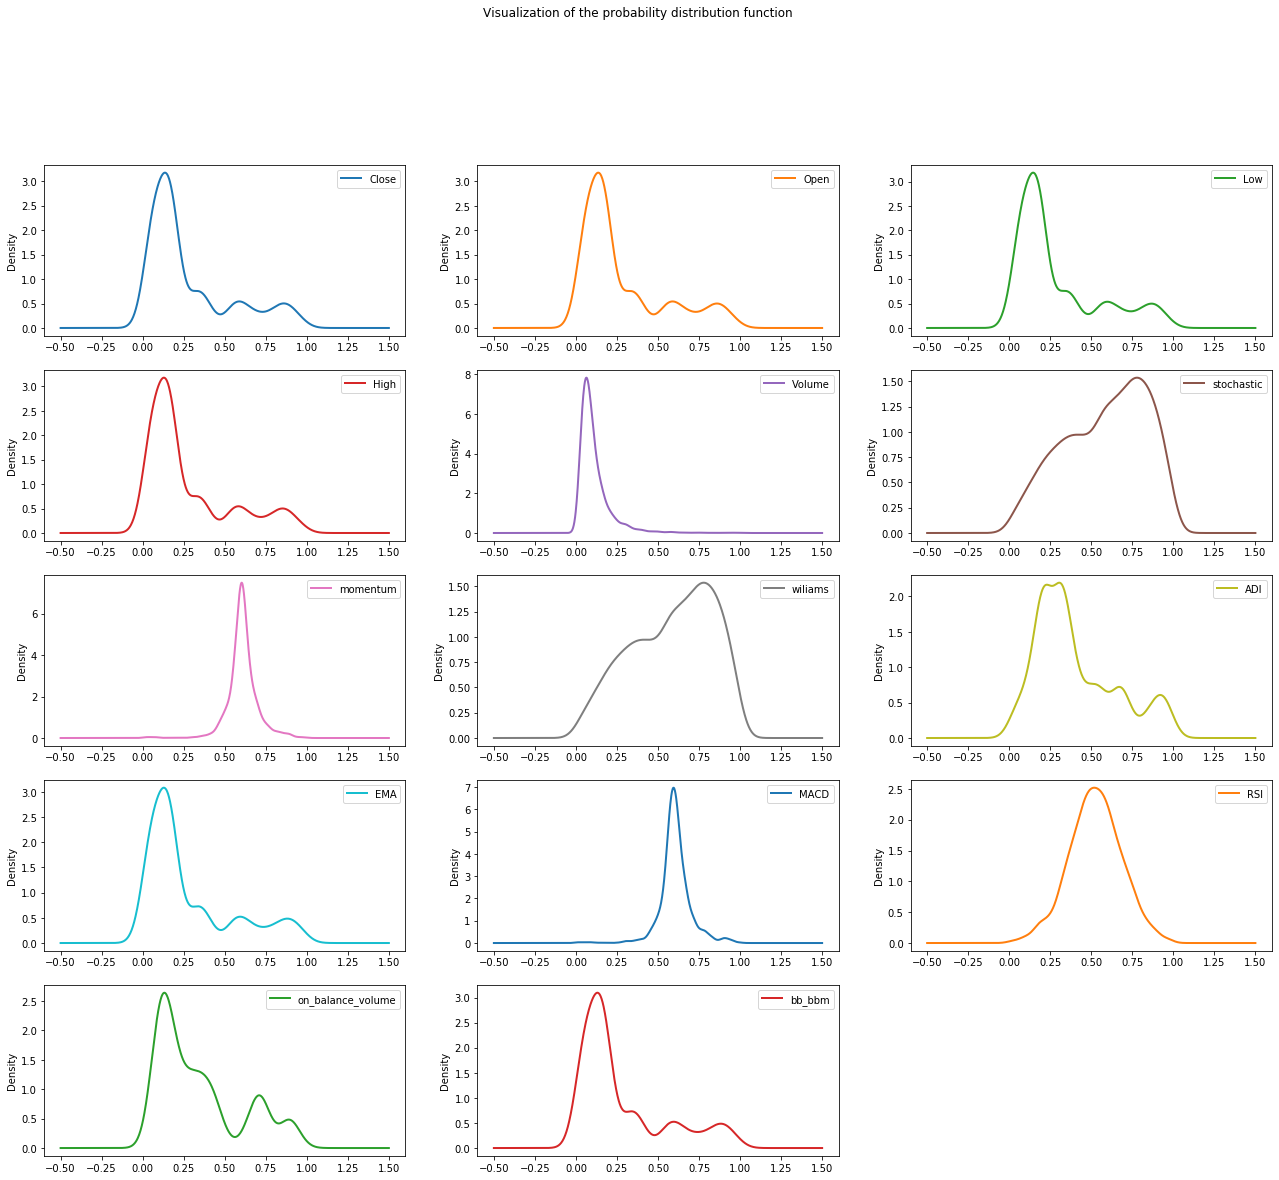

In [14]:


%matplotlib inline
normalMinMaxDF.plot(kind='kde',subplots=True,
        layout=(6, 3),
        figsize=(22,22),
        fontsize=10, 
        linewidth=2,
        sharex=False,
        title='Visualization of the probability distribution function')
plt.show()

## z-score normalization

In [18]:
normalzscoreDF = pd.DataFrame()

for col in marketDF.columns:
    normalzscoreDF[col] =   (marketDF[col] - marketDF[col].mean())/marketDF[col].std(ddof=0)
    
print(normalzscoreDF.describe())

              Close          Open           Low          High        Volume  \
count  2.881000e+03  2.881000e+03  2.881000e+03  2.881000e+03  2.881000e+03   
mean   1.114154e-15 -6.309427e-15 -1.545757e-15 -6.823806e-15 -1.274931e-15   
std    1.000174e+00  1.000174e+00  1.000174e+00  1.000174e+00  1.000174e+00   
min   -1.083590e+00 -1.083496e+00 -1.121462e+00 -1.060284e+00 -1.150479e+00   
25%   -7.167592e-01 -7.158318e-01 -7.127045e-01 -7.190953e-01 -5.920090e-01   
50%   -4.211795e-01 -4.204545e-01 -4.188719e-01 -4.233216e-01 -2.851169e-01   
75%    3.838702e-01  3.837430e-01  3.794727e-01  3.851159e-01  2.322458e-01   
max    2.768180e+00  2.771485e+00  2.756427e+00  2.781196e+00  9.232929e+00   

         stochastic      momentum       wiliams           ADI           EMA  \
count  2.881000e+03  2.881000e+03  2.881000e+03  2.881000e+03  2.881000e+03   
mean   2.144800e-15 -4.346864e-17 -1.586442e-15  1.057876e-14  1.636425e-14   
std    1.000174e+00  1.000174e+00  1.000174e+00  1.

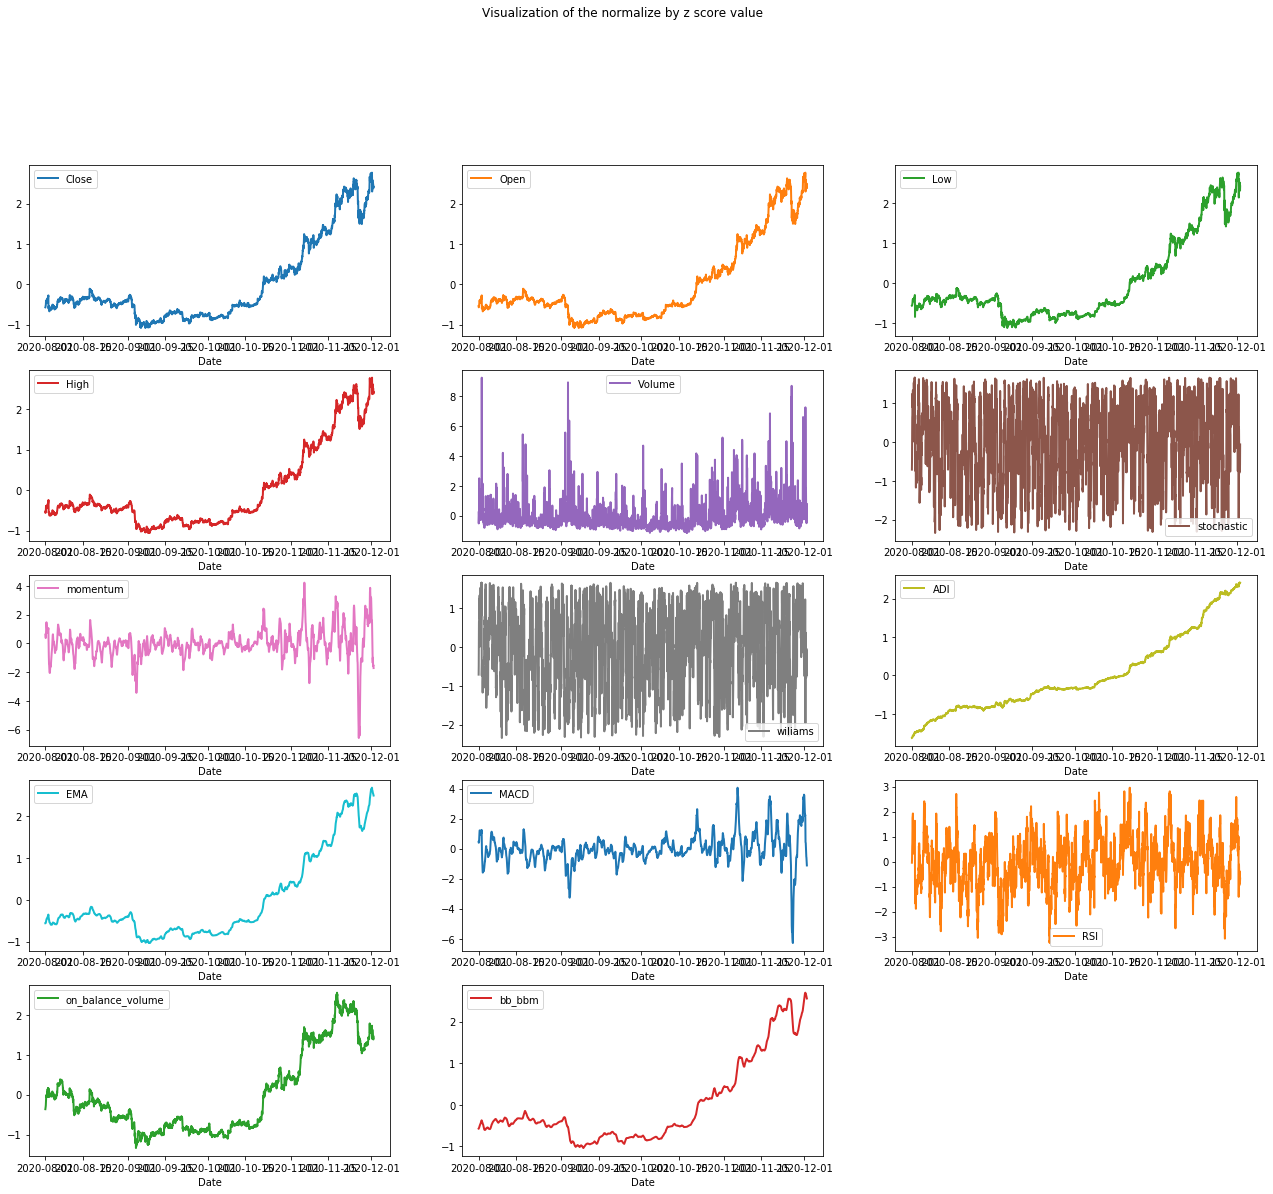

In [21]:
%matplotlib inline
normalzscoreDF.plot(subplots=True,
        layout=(6, 3),
        figsize=(22,22),
        fontsize=10, 
        linewidth=2,
        sharex=False,
        title='Visualization of the normalize by z score value')
plt.show()

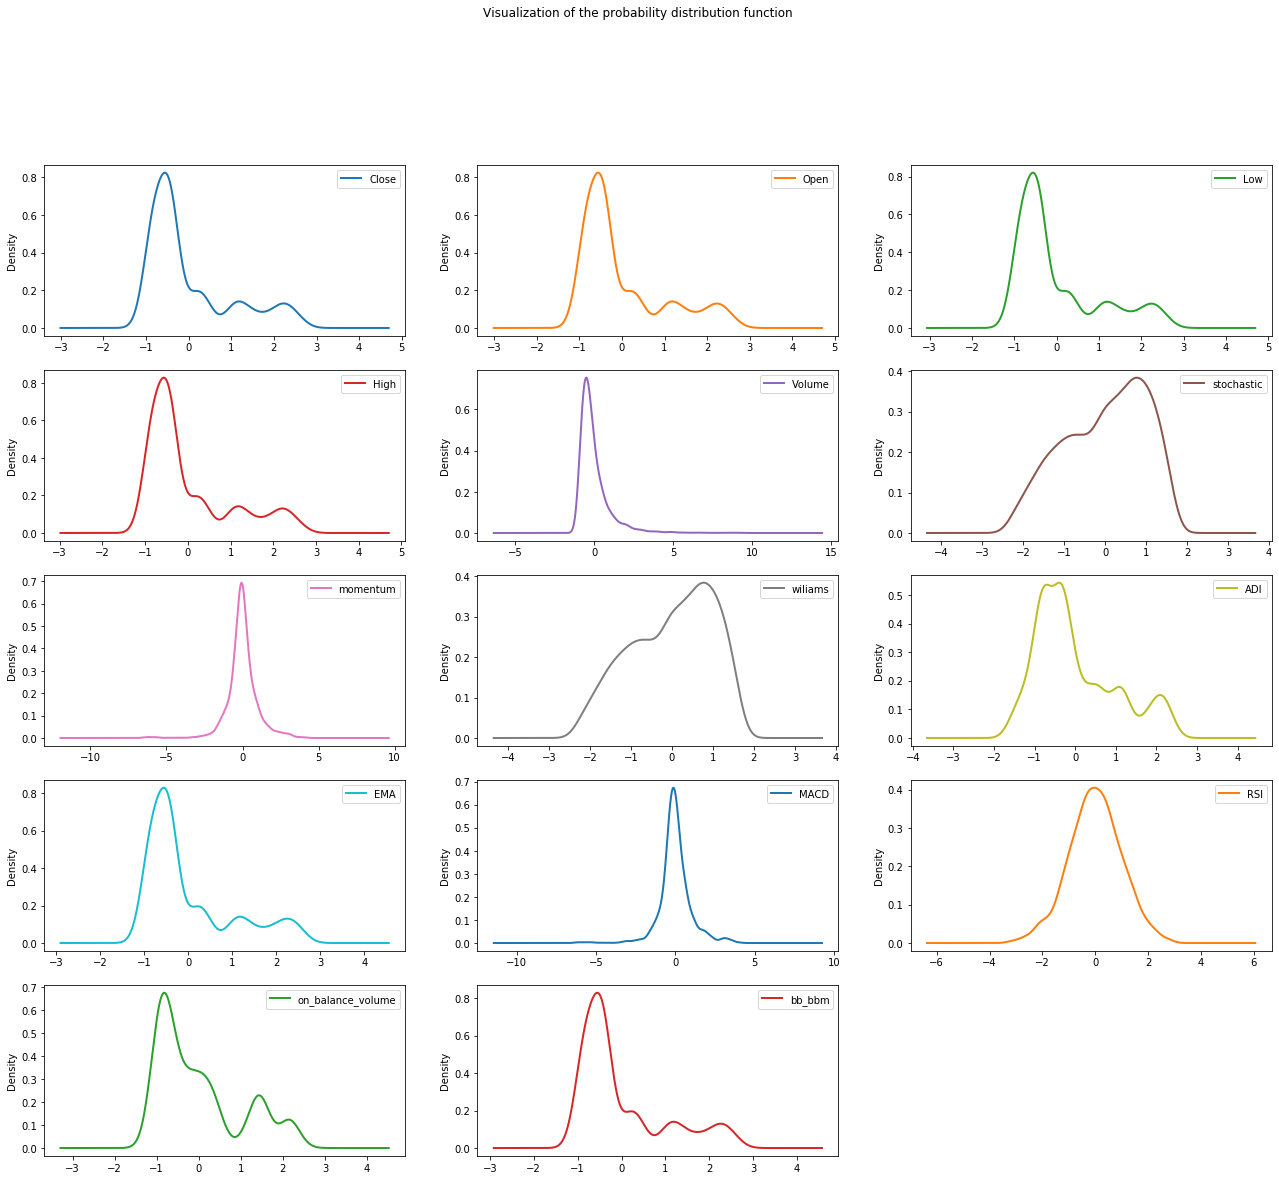

In [22]:
%matplotlib inline
normalzscoreDF.plot(kind='kde',subplots=True,
        layout=(6, 3),
        figsize=(22,22),
        fontsize=10, 
        linewidth=2,
        sharex=False,
        title='Visualization of the probability distribution function')
plt.show()

In [27]:
df = pd.DataFrame({"Col1": [10, 20, 15, 30, 45],
                   "Col2": [13, 23, 18, 33, 48],
                   "Col3": [17, 27, 22, 37, 52]},
                  index=pd.date_range("2020-01-01", "2020-01-05"))
print(df.shift(1))
print(df.shift(-1))


            Col1  Col2  Col3
2020-01-01   NaN   NaN   NaN
2020-01-02  10.0  13.0  17.0
2020-01-03  20.0  23.0  27.0
2020-01-04  15.0  18.0  22.0
2020-01-05  30.0  33.0  37.0
            Col1  Col2  Col3
2020-01-01  20.0  23.0  27.0
2020-01-02  15.0  18.0  22.0
2020-01-03  30.0  33.0  37.0
2020-01-04  45.0  48.0  52.0
2020-01-05   NaN   NaN   NaN


In [30]:
def classify(current, future):
    if float(future) > float(current):  # if the future price is higher than the current, that's a buy, or a 1
        return 1
    else:  # otherwise... it's a 0!
        return 0

marketDF.fillna(method="ffill", inplace=True)  # if there are gaps in data, use previously known values
marketDF.dropna(inplace=True)

marketDF['target'] = marketDF['Close'].shift(-1)


In [31]:
print(marketDF.head())

                        Close      Open       Low      High       Volume  \
Date                                                                       
2020-08-01 00:00:00  11248.35  11335.46  11220.00  11389.00  3192.171488   
2020-08-01 01:00:00  11266.97  11247.86  11226.23  11303.03  1685.735081   
2020-08-01 02:00:00  11334.81  11266.97  11258.71  11345.32  2095.667551   
2020-08-01 03:00:00  11366.16  11334.91  11318.59  11405.93  2687.160709   
2020-08-01 04:00:00  11388.21  11366.16  11335.00  11428.05  3062.946602   

                     stochastic    momentum    wiliams           ADI  \
Date                                                                   
2020-08-01 00:00:00   41.246246  178.371941 -58.753754  1.525144e+06   
2020-08-01 01:00:00   46.837838  151.648441 -53.162162  1.525247e+06   
2020-08-01 02:00:00   67.210210  131.334529 -32.789790  1.526834e+06   
2020-08-01 03:00:00   74.695231  123.555588 -25.304769  1.527074e+06   
2020-08-01 04:00:00   76.017711  12